## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.9, 0.8, 0.7]
NESTEROV = [True, False]

In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bN in NESTEROV:
    for fM in MOMENTUM:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = %.2f NESTEROV = %s" % (fM, bN))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=bN, momentum=fM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-mom-%s-nest-%s" % (str(fM), bN)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.90 NESTEROV = True
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/

50000/50000 [==============================] - 5s 100us/step - loss: 1.1456 - accuracy: 0.5952 - val_loss: 1.3361 - val_accuracy: 0.5296
Epoch 49/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.1390 - accuracy: 0.5995 - val_loss: 1.3492 - val_accuracy: 0.5228
Epoch 50/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.1315 - accuracy: 0.6010 - val_loss: 1.3961 - val_accuracy: 0.5128
Experiment with MOMENTUM = 0.80 NESTEROV = True
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________

50000/50000 [==============================] - 5s 100us/step - loss: 1.3823 - accuracy: 0.5167 - val_loss: 1.4449 - val_accuracy: 0.4866
Epoch 46/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3748 - accuracy: 0.5189 - val_loss: 1.4412 - val_accuracy: 0.4931
Epoch 47/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3700 - accuracy: 0.5202 - val_loss: 1.4783 - val_accuracy: 0.4686
Epoch 48/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3643 - accuracy: 0.5226 - val_loss: 1.4272 - val_accuracy: 0.4928
Epoch 49/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3578 - accuracy: 0.5251 - val_loss: 1.4401 - val_accuracy: 0.4878
Epoch 50/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.3520 - accuracy: 0.5278 - val_loss: 1.4318 - val_accuracy: 0.4950
Experiment with MOMENTUM = 0.70 NESTEROV = True
Model: "model_1"
_____________________________________________________

50000/50000 [==============================] - 5s 101us/step - loss: 1.4918 - accuracy: 0.4795 - val_loss: 1.5315 - val_accuracy: 0.4643
Epoch 43/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4867 - accuracy: 0.4824 - val_loss: 1.5364 - val_accuracy: 0.4541
Epoch 44/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4820 - accuracy: 0.4830 - val_loss: 1.5302 - val_accuracy: 0.4619
Epoch 45/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.4766 - accuracy: 0.4856 - val_loss: 1.5061 - val_accuracy: 0.4724
Epoch 46/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4711 - accuracy: 0.4884 - val_loss: 1.5122 - val_accuracy: 0.4666
Epoch 47/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4669 - accuracy: 0.4891 - val_loss: 1.5073 - val_accuracy: 0.4682
Epoch 48/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4608 - accuracy: 0.4924 - val_loss:

Epoch 40/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.2439 - accuracy: 0.5629 - val_loss: 1.4126 - val_accuracy: 0.5023
Epoch 41/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.2285 - accuracy: 0.5689 - val_loss: 1.3549 - val_accuracy: 0.5196
Epoch 42/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.2225 - accuracy: 0.5712 - val_loss: 1.3787 - val_accuracy: 0.5125
Epoch 43/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.2217 - accuracy: 0.5700 - val_loss: 1.3931 - val_accuracy: 0.5038
Epoch 44/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.2051 - accuracy: 0.5759 - val_loss: 1.3621 - val_accuracy: 0.5130
Epoch 45/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.1966 - accuracy: 0.5802 - val_loss: 1.3593 - val_accuracy: 0.5173
Epoch 46/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.1957 - accuracy: 0.5788 - val_

Epoch 38/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.4289 - accuracy: 0.4996 - val_loss: 1.4864 - val_accuracy: 0.4737
Epoch 39/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.4223 - accuracy: 0.5032 - val_loss: 1.4624 - val_accuracy: 0.4807
Epoch 40/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.4150 - accuracy: 0.5048 - val_loss: 1.4642 - val_accuracy: 0.4767
Epoch 41/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.4095 - accuracy: 0.5084 - val_loss: 1.4519 - val_accuracy: 0.4820
Epoch 42/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.4028 - accuracy: 0.5083 - val_loss: 1.4666 - val_accuracy: 0.4775
Epoch 43/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.3968 - accuracy: 0.5121 - val_loss: 1.4634 - val_accuracy: 0.4814
Epoch 44/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.3899 - accuracy: 0.5143 - val_

Epoch 36/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.5189 - accuracy: 0.4697 - val_loss: 1.5392 - val_accuracy: 0.4593
Epoch 37/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.5136 - accuracy: 0.4715 - val_loss: 1.5493 - val_accuracy: 0.4495
Epoch 38/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.5069 - accuracy: 0.4743 - val_loss: 1.5238 - val_accuracy: 0.4624
Epoch 39/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.5015 - accuracy: 0.4744 - val_loss: 1.5267 - val_accuracy: 0.4601
Epoch 40/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.4963 - accuracy: 0.4757 - val_loss: 1.5219 - val_accuracy: 0.4637
Epoch 41/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4910 - accuracy: 0.4781 - val_loss: 1.5157 - val_accuracy: 0.4637
Epoch 42/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.4853 - accuracy: 0.4821 - val_

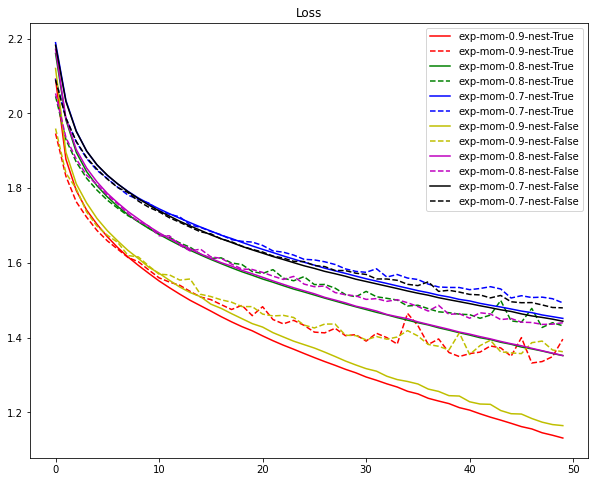

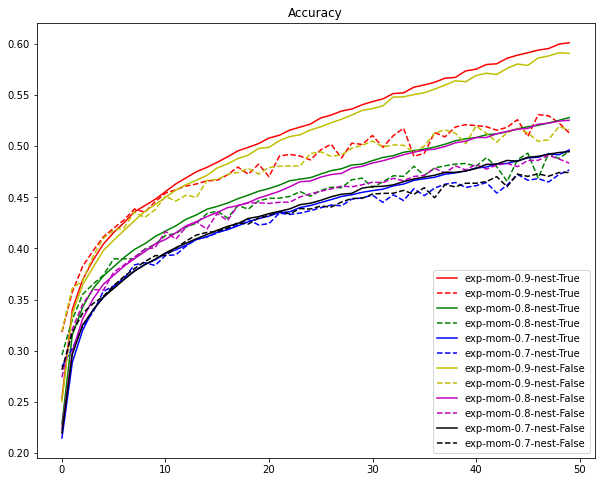

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(10,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()